Install all necessary libraries

In [1]:
install.packages("BiocManager")

BiocManager::install()
BiocManager::install(c("rhdf5", "Hmisc","tximeta", "PoiClaClu", "glmpca", "ggbeeswarm", "apeglm", "IHW",
                       "ReportingTools", "Gviz", "sva", "RUVSeq", "vsn", "pheatmap", "DESeq2"))

install.packages("devtools")
library(devtools)
install_github("wjawaid/enrichR")
library(enrichR)
library("rhdf5")
library("vsn")
library("tools")
library("magrittr")
library("dplyr")
library("ggplot2")
library("pheatmap")
library("RColorBrewer")
library("genefilter")
library("AnnotationDbi")
library("rhdf5")
library("Hmisc")
library("DESeq2")
library("tximeta")
library("PoiClaClu")
library("glmpca")
library("ggbeeswarm")
library("apeglm")
library("IHW")
library("ReportingTools")
library("Gviz")
library("sva")
library("RUVSeq")


The downloaded binary packages are in
	/var/folders/5l/20v0p4zx1j90p6kjpcl3jv_c0000gn/T//RtmpZXFcDJ/downloaded_packages


Bioconductor version 3.10 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'BiocVersion'



The downloaded binary packages are in
	/var/folders/5l/20v0p4zx1j90p6kjpcl3jv_c0000gn/T//RtmpZXFcDJ/downloaded_packages


Old packages: 'boot', 'foreign', 'Hmisc', 'KernSmooth', 'mgcv', 'nlme',
  'polspline', 'survival', 'testthat'
Bioconductor version 3.10 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'rhdf5', 'Hmisc', 'tximeta', 'PoiClaClu', 'glmpca',
  'ggbeeswarm', 'apeglm', 'IHW', 'ReportingTools', 'Gviz', 'sva', 'RUVSeq',
  'vsn', 'pheatmap', 'org.Hs.eg.db', 'DESeq2'
also installing the dependencies ‘formatR’, ‘bit64’, ‘blob’, ‘memoise’, ‘reshape’, ‘lambda.r’, ‘futile.options’, ‘DelayedArray’, ‘DBI’, ‘RSQLite’, ‘RCurl’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘dbplyr’, ‘GenomeInfoDbData’, ‘coda’, ‘bbmle’, ‘graph’, ‘RBGL’, ‘GO.db’, ‘AnnotationForge’, ‘Rgraphviz’, ‘R.oo’, ‘R.methodsS3’, ‘VariantAnnotation’, ‘OrganismDbi’, ‘GGally’, ‘zlibbioc’, ‘progress’, ‘dichromat’, ‘bitops’, ‘Rhtslib’, ‘futile.logger’, ‘snow’, ‘ShortRead’, ‘DESeq’, ‘aroma.light’, ‘affyio’, ‘preprocessCore’, ‘Rhdf5lib’, ‘SummarizedExperiment’, ‘tximport’, ‘S4Vectors’, ‘GenomicRanges’, ‘AnnotationDbi’, ‘GenomicFeatures


  There is a binary version available but the source version is later:
      binary source needs_compilation
Hmisc  4.2-0  4.3-0              TRUE


The downloaded binary packages are in
	/var/folders/5l/20v0p4zx1j90p6kjpcl3jv_c0000gn/T//RtmpZXFcDJ/downloaded_packages


installing the source packages ‘GenomeInfoDbData’, ‘GO.db’, ‘PFAM.db’, ‘Hmisc’, ‘org.Hs.eg.db’

Warning message in install.packages(...):
“installation of package ‘Hmisc’ had non-zero exit status”Old packages: 'boot', 'foreign', 'Hmisc', 'KernSmooth', 'mgcv', 'nlme',
  'polspline', 'survival', 'testthat'
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted

Then follow workflow described at ["RNA-seq workflow: gene-level exploratory analysis and differential expression"](http://master.bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#differential-expression-analysis) by Michael Love

## Download raw counts from ARCHS4 using updated script

In [5]:
destination_file = "mouse_matrix_download.h5"
extracted_expression_file = "GSE89665_expression_matrix.tsv"
url = "https://s3.amazonaws.com/mssm-seq-matrix/mouse_matrix.h5"

# Check if gene expression file was already downloaded and check integrity, if not in current directory download file form repository
if(!file.exists(destination_file)){
    print("Downloading compressed gene expression matrix.")
    download.file(url, destination_file, quiet = FALSE)
} else{
    print("Verifying file integrity...")
    checksum = md5sum(destination_file)
    
    if(destination_file == "human_matrix_download.h5"){
        # human checksum (checksum is for latest version of ARCHS4 data)
        correct_checksum = "34197866d7841cc4fb31e09195faa150"
    } else{
        # mouse checksum (checksum is for latest version of ARCHS4 data)
        correct_checksum = "55441d1af9da82c6f3d368c8fa554d42"
    }
    
    if(checksum != correct_checksum){
        print("Existing file looks corrupted or is out of date. Downloading compressed gene expression matrix again.")
        download.file(url, destination_file, quiet = FALSE)
    } else{
        print("Latest ARCHS4 file already exists.")
    }
}

checksum = md5sum(destination_file)
if(destination_file == "human_matrix_download.h5"){
    # human checksum (checksum is for latest version of ARCHS4 data)
    correct_checksum = "34197866d7841cc4fb31e09195faa150"
} else{
    # mouse checksum (checksum is for latest version of ARCHS4 data)
    correct_checksum = "55441d1af9da82c6f3d368c8fa554d42"
}

if(checksum != correct_checksum){
    print("File download ran into problems. Please try to download again. The files are also available for manual download at http://amp.pharm.mssm.edu/archs4/download.html.")
} else{
    # Selected samples to be extracted
    samp = c("GSM2386382","GSM2386383","GSM2386384","GSM2386385","GSM2386386","GSM2386387","GSM2386388","GSM2386389","GSM2386390","GSM2386391","GSM2386392","GSM2386393","GSM2674745","GSM2674746","GSM2674747","GSM2674748","GSM2674749","GSM2674750","GSM2674751","GSM2674752","GSM2674753","GSM2674754","")

    # Retrieve information from compressed data
    samples = h5read(destination_file, "meta/Sample_geo_accession")
    tissue = h5read(destination_file, "meta/Sample_source_name_ch1")
    genes = h5read(destination_file, "meta/genes")

    # Identify columns to be extracted
    sample_locations = which(samples %in% samp)

    # extract gene expression from compressed data
    expression = h5read(destination_file, "data/expression", index=list(1:length(genes), sample_locations))
    H5close()
    rownames(expression) = genes
    colnames(expression) = samples[sample_locations]

    # Print file
    write.table(expression, file=extracted_expression_file, sep="\t", quote=FALSE)
    print(paste0("Expression file was created at ", getwd(), "/", extracted_expression_file))
}

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.1 (2019-07-05)
Installing package(s) 'rhdf5'
also installing the dependency ‘Rhdf5lib’




The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//Rtmp7jkp7s/downloaded_packages


Update old packages: 'backports', 'BiocManager', 'callr', 'covr', 'data.table',
  'digest', 'DT', 'gdtools', 'gridSVG', 'hms', 'htmlTable', 'htmltools',
  'htmlwidgets', 'IRanges', 'KernSmooth', 'knitr', 'lambda.r', 'later', 'mgcv',
  'openxlsx', 'pkgbuild', 'pkgconfig', 'promises', 'purrr', 'RcppArmadillo',
  'rlang', 'rvcheck', 'shiny', 'survival', 'testthat', 'xfun'


[1] "Downloading compressed gene expression matrix."
[1] "Expression file was created at /Users/maximkuleshov/Work/19 10-Sep Dirk Homann/Microarray HL project/GSE89665_expression_matrix.tsv"


In [2]:
countdata <- read.csv(file="GSE89665_expression_matrix.tsv", header=TRUE, sep="\t")[,13:22]
coldata <- read.csv(file="GSE89665-GPL17021_series_matrix 2.txt", header=TRUE, sep="\t", row.names = 1)
head(countdata)
head(coldata)

,GSM2674745,GSM2674746,GSM2674747,GSM2674748,GSM2674749,GSM2674750,GSM2674751,GSM2674752,GSM2674753,GSM2674754
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610007P14Rik,398,309,397,345,349,403,342,523,687,468
0610009B22Rik,46,56,82,43,66,56,40,69,106,101
0610009L18Rik,9,4,10,4,4,16,10,9,10,4
0610009O20Rik,384,274,457,309,477,383,359,447,594,526
0610010F05Rik,127,99,238,133,186,154,164,269,302,200
0610010K14Rik,450,316,394,401,391,417,423,488,646,457


,title,condition,geo_accession,source_name,organism,characteristics,relation
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GSM2674745,LCMV_Help_001,Help,GSM2674745,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933114
GSM2674746,LCMV_Help_002,Help,GSM2674746,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933115
GSM2674747,LCMV_Help_003,Help,GSM2674747,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933116
GSM2674748,LCMV_Help_004,Help,GSM2674748,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933117
GSM2674749,LCMV_Help_005,Help,GSM2674749,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933118
GSM2674750,LCMV_No_Help_001,No_Help,GSM2674750,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933119


In [3]:
dds <- DESeqDataSetFromMatrix(countData = countdata,
                                 colData = coldata,
                                 design = ~ condition)

## Filtering
Filter rows with at least 5 samples with a count of 10 or higher

In [4]:
nrow(dds)

[1] 32544

In [5]:
keep <- rowSums(counts(dds) >= 10) >= 5
dds <- dds[keep,]
nrow(dds)

[1] 12222

## Normalization

As PCA and clustering works better for data with same range of variance at different ranges of the mean values, we need to normalize data, yet preserve raw counts for `DESeq2`.

This dataset is small (10 samples - 5 controls and 5 treatments), so we'll use `rlog` (regularized-logarithm transformation) ([Michael I Love, Wolfgang Huber, Simon Anders: Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2. Genome Biology 2014, 15:550.](http://dx.doi.org/10.1186/s13059-014-0550-8)), that works well for datasets with less than 30 samples.

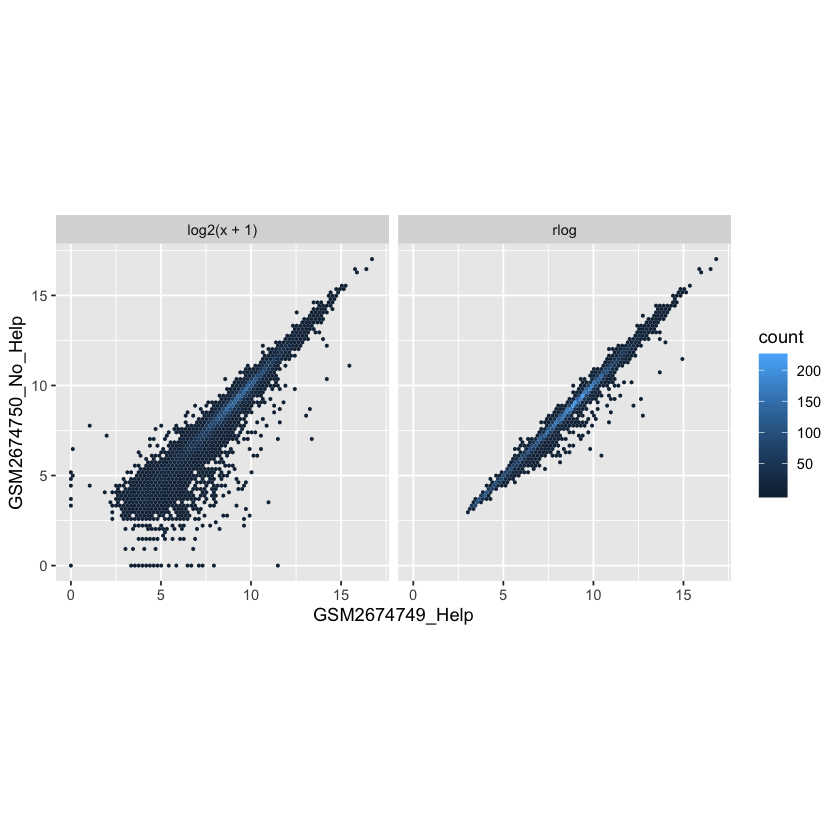

In [17]:
rld <- rlog(dds, blind = FALSE)

dds_ <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds_, normalized=TRUE)[, 5:6]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(rld)[, 5:6]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("GSM2674749_Help", "GSM2674750_No_Help")  

ggplot(df, aes(x = GSM2674749_Help, y = GSM2674750_No_Help)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation) 

## Sample distances

#### Heatmap of sample-to-sample eucledean distances using the variance stabilizing transformed values

Found more than one class "unit" in cache; using the first, from namespace 'ggbio'
Also defined by 'hexbin'
Found more than one class "unit" in cache; using the first, from namespace 'ggbio'
Also defined by 'hexbin'


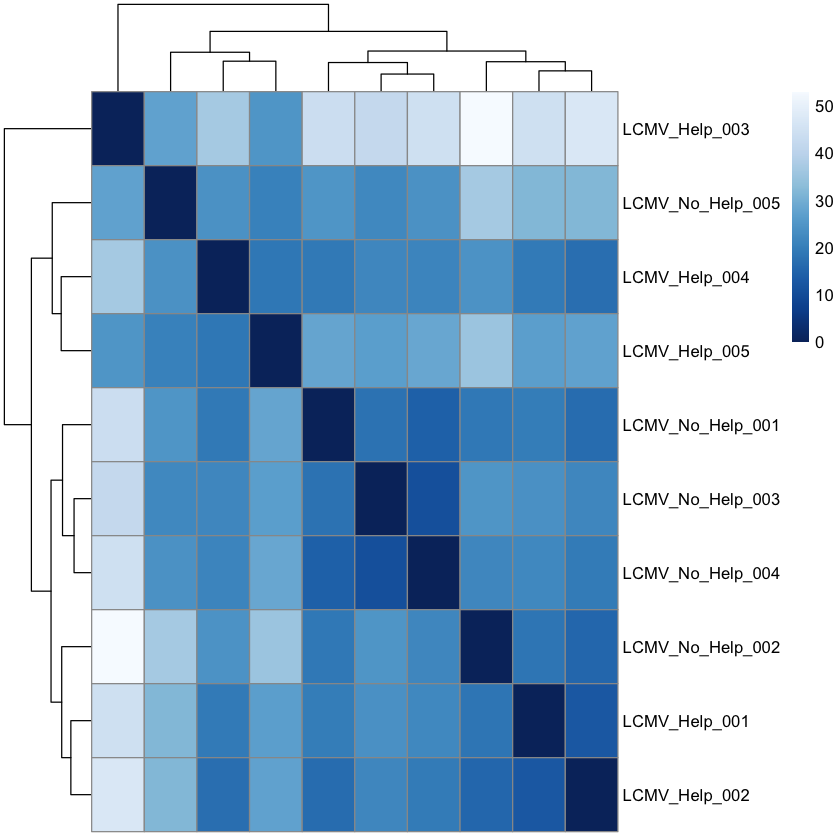

In [18]:
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- paste(rld$title)
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

#### Heatmap of sample-to-sample Poisson distances

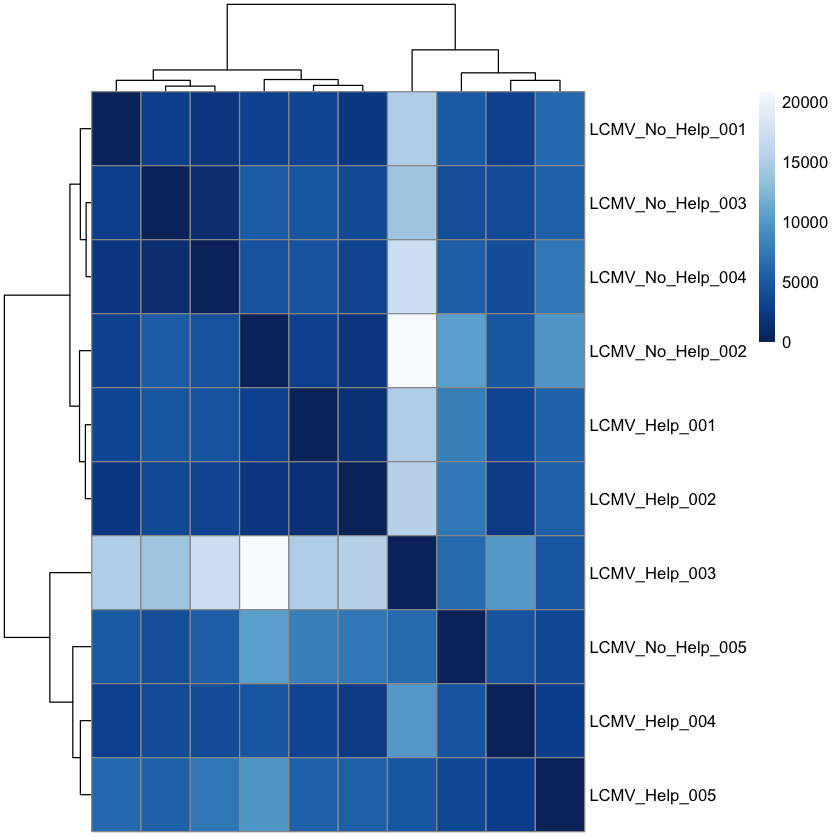

In [22]:
poisd <- PoissonDistance(t(counts(dds)))
samplePoisDistMatrix <- as.matrix( poisd$dd )
rownames(samplePoisDistMatrix) <- paste(dds$title)
colnames(samplePoisDistMatrix) <- NULL
pheatmap(samplePoisDistMatrix,
         clustering_distance_rows = poisd$dd,
         clustering_distance_cols = poisd$dd,
         col = colors)

### PCA plot using the `rlog` data

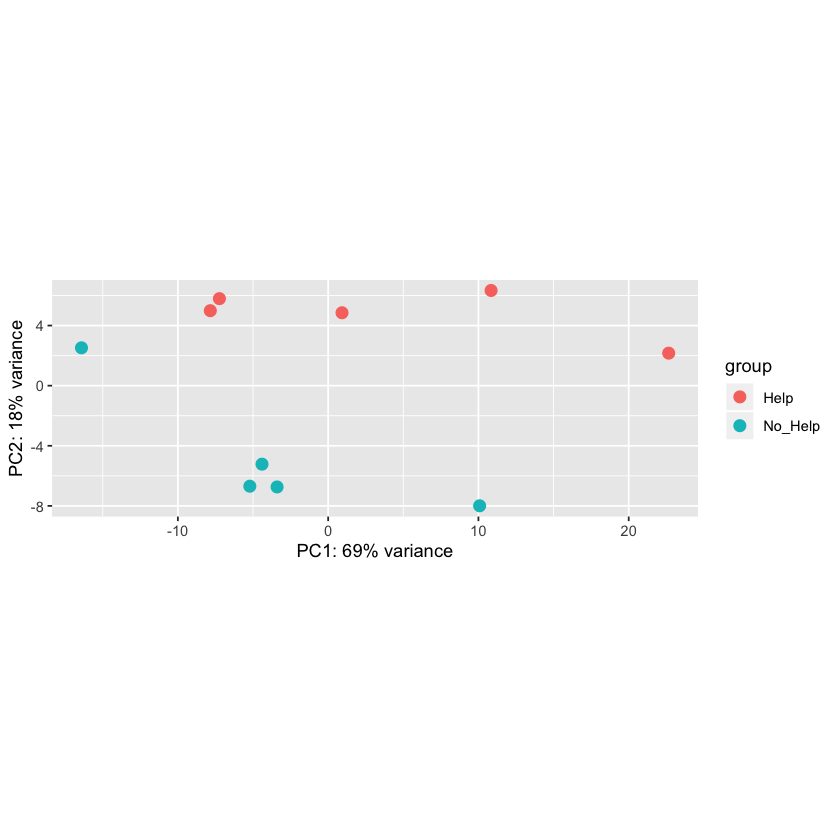

In [23]:
plotPCA(rld, intgroup = "condition")

## Differential expression analysis

In [25]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [134]:
res <- results(dds, contrast=c("condition","Help","No_Help"))
sum(res$pvalue < 0.05, na.rm=TRUE)

[1] 1923

Filter genes by FDR and log2 fold change. Use FDR cutoff = 0.05 and lFC cutoff = 1.

In [130]:
results_significant <- subset(results(dds, contrast=c("condition","Help","No_Help"), alpha = 0.1), padj < 0.1)
dim(results_significant)

[1] 796   6

In [131]:
res_sig_up <- subset(results_significant, log2FoldChange > 1)
res_sig_dn <- subset(results_significant, log2FoldChange < -1)

## Enrichment analysis

* [Enrichr results for up-regulated genes](https://amp.pharm.mssm.edu/Enrichr/enrich?dataset=aaddd7a7619938f0b1cbdf28247d0b97)
* [Enrichr results for down-regulated genes](https://amp.pharm.mssm.edu/Enrichr/enrich?dataset=dcf0a6b8ce352c036d5ebeee5f4f731f)

In [137]:
dbs <- c("WikiPathways_2019_Mouse", "KEGG_2019_Mouse", "GO_Molecular_Function_2018", "GO_Cellular_Component_2018", "GO_Biological_Process_2018", "Mouse_Gene_Atlas")
enriched_up <- enrichr(rownames(res_sig_up), dbs)
enriched_dn <- enrichr(rownames(res_sig_dn), dbs)

Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.


#### WikiPathways_2019_Mouse up

In [142]:
head(subset(enriched_up[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Inflammatory Response Pathway WP458,3/30,0.006106611,1,8.000000,40.787066,CD40;CD40LG;IL5RA
IL-7 Signaling Pathway WP297,3/44,0.017533267,1,5.454545,22.056301,BLK;IRS2;IL7R
Adipogenesis genes WP447,5/134,0.026686082,1,2.985075,10.816756,MEF2C;MEF2B;EBF1;IRS2;SCD1
IL-9 Signaling Pathway WP10,2/24,0.035854034,1,6.666667,22.188661,IRS2;IL9R
Non-odorant GPCRs WP1396,7/267,0.051134996,1,2.097378,6.236106,VIPR1;CNR2;GRM6;CCR7;ACKR2;CCR6;FFAR1
Aflatoxin B1 metabolism WP1262,1/5,0.060962597,1,16.000000,44.759916,EPHX1
Metapathway biotransformation WP1251,4/141,0.100843603,1,2.269504,5.206660,CYP4F18;EPHX1;HS3ST1;CHST3
NLR Proteins WP1256,1/9,0.107056049,1,8.888889,19.861358,CD40
Macrophage markers WP2271,1/10,0.118222856,1,8.000000,17.081471,CD83


#### WikiPathways_2019_Mouse down

In [144]:
head(subset(enriched_dn[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Lung fibrosis WP3632,2/61,0.006305780,1.0000000,16.813787,85.183499,DSP;PDGFB
Alpha6-Beta4 Integrin Signaling Pathway WP488,2/67,0.007562828,0.6655289,15.308075,74.772446,DSP;TRP73
p53 signaling WP2902,2/67,0.007562828,0.4436859,15.308075,74.772446,PERP;TRP73
Osteoclast WP454,1/14,0.026965134,1.0000000,36.630037,132.352036,PDGFB
Inflammatory Response Pathway WP458,1/30,0.056915489,1.0000000,17.094017,48.994663,CD80
Splicing factor NOVA regulated synaptic proteins WP1983,1/42,0.078786879,1.0000000,12.210012,31.025749,ANK3
Primary Focal Segmental Glomerulosclerosis FSGS WP2573,1/72,0.131325635,1.0000000,7.122507,14.459226,CD80
Apoptosis WP1254,1/81,0.146509725,1.0000000,6.331117,12.159946,TRP73
ESC Pluripotency Pathways WP339,1/118,0.206261413,1.0000000,4.345937,6.860543,PDGFB


#### KEGG_2019_Mouse up

In [145]:
head(subset(enriched_up[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Primary immunodeficiency,10/36,1.486179e-11,4.503121e-09,22.222222,554.04951,CD79A;CD40;CD4;CD40LG;CD19;BLNK;TNFRSF13C;IL7R;AICDA;ADA
Hematopoietic cell lineage,11/94,2.586178e-08,3.918060e-06,9.361702,163.55361,H2-DMB2;CR2;CD4;CD19;H2-OB;IL5RA;FCER2A;IL7R;MS4A1;IL9R;CD22
Intestinal immune network for IgA production,6/43,1.486524e-05,1.501390e-03,11.162791,124.09099,H2-DMB2;CD40;CD40LG;H2-OB;TNFRSF13C;AICDA
B cell receptor signaling pathway,7/72,3.233792e-05,2.449598e-03,7.777778,80.41654,CD79B;CD79A;CR2;CD19;BLNK;CD22;RASGRP3
Asthma,4/25,2.451951e-04,1.485882e-02,12.800000,106.41224,H2-DMB2;CD40;CD40LG;H2-OB
Cytokine-cytokine receptor interaction,11/292,1.172553e-03,5.921392e-02,3.013699,20.33816,CD40;CD4;CD40LG;LTA;ACKR4;IL5RA;CCR7;TNFRSF13C;CCR6;IL7R;IL9R
Cell adhesion molecules (CAMs),7/170,5.630518e-03,2.437210e-01,3.294118,17.06206,H2-DMB2;CD40;CD4;CD40LG;H2-OB;SDC1;CD22
Allograft rejection,4/63,7.975366e-03,3.020670e-01,5.079365,24.54043,H2-DMB2;CD40;CD40LG;H2-OB
NF-kappa B signaling pathway,5/102,9.146247e-03,3.079237e-01,3.921569,18.40946,CD40;CD40LG;BLNK;LTA;TNFRSF13C


#### KEGG_2019_Mouse down

In [146]:
head(subset(enriched_dn[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Hippo signaling pathway,3/159,0.003653035,1.0000000,9.675859,54.30282,YAP1;TRP73;WNT9A
Cell adhesion molecules (CAMs),3/170,0.004405005,0.6673582,9.049774,49.09515,CD80;CTLA4;PDCD1
p53 signaling pathway,2/71,0.008458532,0.8543118,14.445648,68.94301,PERP;TRP73
Autoimmune thyroid disease,2/78,0.010134548,0.7676920,13.149244,60.37877,CD80;CTLA4
Rheumatoid arthritis,2/84,0.011678599,0.7077231,12.210012,54.33452,CD80;CTLA4
Prostate cancer,2/97,0.015352603,0.7753064,10.573619,44.16040,INSRR;PDGFB
T cell receptor signaling pathway,2/101,0.016570717,0.7172753,10.154862,41.63613,CTLA4;PDCD1
Wnt signaling pathway,2/160,0.038851096,1.0000000,6.410256,20.82063,PRICKLE1;WNT9A
Vitamin digestion and absorption,1/24,0.045790884,1.0000000,21.367521,65.89039,SLC52A3


#### GO_Molecular_Function_2018 up

In [147]:
head(subset(enriched_up[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
immunoglobulin receptor binding (GO:0034987),10/82,7.560527e-08,8.702167e-05,9.756098,159.97795,IGHG3;IGHM;IGHG1;IGHV2-5;IGKC;IGLC3;IGLC2;IGHV1-69;JCHAIN;IGHV1-18
cytokine receptor activity (GO:0004896),7/74,3.867642e-05,2.225828e-02,7.567568,76.88861,CD4;ACKR4;IL5RA;ACKR2;CCR6;IL7R;IL9R
chemokine receptor activity (GO:0004950),4/21,1.206544e-04,4.629107e-02,15.238095,137.48694,ACKR4;CCR7;ACKR2;CCR6
G-protein coupled chemoattractant receptor activity (GO:0001637),3/16,9.580407e-04,2.756762e-01,15.000000,104.25930,ACKR4;ACKR2;CCR6
"transcriptional activator activity, RNA polymerase II distal enhancer sequence-specific binding (GO:0001205)",3/18,1.370465e-03,3.154811e-01,13.333333,87.90140,SPIB;MEF2C;MEF2B
sialyltransferase activity (GO:0008373),3/21,2.172803e-03,4.168161e-01,11.428571,70.07700,ST6GAL1;ST8SIA1;ST8SIA6
"alpha-N-acetylneuraminate alpha-2,8-sialyltransferase activity (GO:0003828)",2/6,2.258314e-03,3.713314e-01,26.666667,162.48364,ST8SIA1;ST8SIA6
acetylcholine receptor regulator activity (GO:0030548),2/8,4.146432e-03,5.965679e-01,20.000000,109.71014,LYNX1;LYPD6B
C-C chemokine binding (GO:0019957),2/8,4.146432e-03,5.302826e-01,20.000000,109.71014,CCR7;CCR6


#### GO_Molecular_Function_2018 down

In [148]:
head(subset(enriched_dn[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
"phosphatidylinositol-4,5-bisphosphate 3-kinase activity (GO:0046934)",2/69,0.008004974,1,14.864363,71.76057,CD80;PDGFB
phosphatidylinositol bisphosphate kinase activity (GO:0052813),2/72,0.008689563,1,14.245014,67.60161,CD80;PDGFB
phosphatidylinositol 3-kinase activity (GO:0035004),2/77,0.009886773,1,13.320013,61.49261,CD80;PDGFB
MHC class II protein binding (GO:0042289),1/6,0.011644447,1,85.470085,380.59196,LAG3
acyl-CoA oxidase activity (GO:0003997),1/6,0.011644447,1,85.470085,380.59196,ACOXL
N-acetylglucosamine 6-O-sulfotransferase activity (GO:0001517),1/7,0.013572308,1,73.260073,314.99808,CHST2
protein binding involved in heterotypic cell-cell adhesion (GO:0086080),1/7,0.013572308,1,73.260073,314.99808,DSP
superoxide-generating NADPH oxidase activator activity (GO:0016176),1/9,0.017417047,1,56.980057,230.78666,PDGFB
endopeptidase inhibitor activity (GO:0004866),2/112,0.020125134,1,9.157509,35.76727,SERPINE2;SPOCK2


#### GO_Cellular_Component_2018 up

In [149]:
head(subset(enriched_up[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
early endosome membrane (GO:0031901),3/74,0.06554401,1,3.243243,8.837946,GGA2;PMEPA1;SNX8
microvillus (GO:0005902),2/43,0.10069719,1,3.720930,8.541907,FSCN1;RAPGEF3
signal recognition particle (GO:0048500),1/9,0.10705605,1,8.888889,19.861358,DERL3
NMDA selective glutamate receptor complex (GO:0017146),1/9,0.10705605,1,8.888889,19.861358,SHANK1
ISWI-type complex (GO:0031010),1/11,0.12925057,1,7.272727,14.880017,CECR2
nuclear replication fork (GO:0043596),1/11,0.12925057,1,7.272727,14.880017,NUGGC
CD40 receptor complex (GO:0035631),1/11,0.12925057,1,7.272727,14.880017,CD40
beta-catenin-TCF complex (GO:1990907),1/11,0.12925057,1,7.272727,14.880017,TCF4
clathrin-coated vesicle (GO:0030136),3/101,0.13285776,1,2.376238,4.796379,GGA2;CD4;IL7R


#### GO_Cellular_Component_2018 down

In [150]:
head(subset(enriched_dn[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
platelet alpha granule (GO:0031091),3/91,0.0007396308,0.3298753,16.90617,121.88266,SERPINE2;CD109;PDGFB
intercalated disc (GO:0014704),2/32,0.0017710465,0.3949434,32.05128,203.08284,DSP;ANK3
extrinsic component of external side of plasma membrane (GO:0031232),1/7,0.0135723080,1.0000000,73.26007,314.99808,SERPINE2
spectrin-associated cytoskeleton (GO:0014731),1/8,0.0154965058,1.0000000,64.10256,267.12440,ANK3
axon initial segment (GO:0043194),1/9,0.0174170468,1.0000000,56.98006,230.78666,ANK3
node of Ranvier (GO:0033268),1/12,0.0231567960,1.0000000,42.73504,160.91739,ANK3
platelet alpha granule membrane (GO:0031092),1/17,0.0326505321,1.0000000,30.16591,103.22456,CD109
sarcoplasmic reticulum (GO:0016529),1/30,0.0569154885,1.0000000,17.09402,48.99466,ANK3
sarcoplasm (GO:0016528),1/32,0.0605955305,1.0000000,16.02564,44.92843,ANK3


#### GO_Biological_Process_2018 up

In [151]:
head(subset(enriched_up[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B cell receptor signaling pathway (GO:0050853),14/105,5.276067e-11,2.692377e-07,10.666667,252.42939,BLK;IGHM;MEF2C;IGHV2-5;IGHV1-69;IGHV1-18;IGHG3;CD79B;CD79A;IGHG1;IGKC;CD19;IGLC3;IGLC2
B cell activation (GO:0042113),11/74,1.950532e-09,4.976784e-06,11.891892,238.49384,FCRL1;CD79B;CD79A;CD40;CR2;MEF2C;CD40LG;BANK1;BLNK;MS4A1;AICDA
antigen receptor-mediated signaling pathway (GO:0050851),16/258,1.714168e-07,2.915799e-04,4.961240,77.29200,BLK;IGHM;MEF2C;IGHV2-5;IGHV1-69;BTNL2;IGHV1-18;CD79B;IGHG3;CD79A;IGHG1;CD4;IGKC;CD19;IGLC3;IGLC2
positive regulation of B cell activation (GO:0050871),11/120,3.268006e-07,4.169159e-04,7.333333,109.51538,IGHG3;IGHM;IGHG1;MEF2C;IGHV2-5;IGKC;IGLC3;IRS2;IGHV1-69;IGLC2;IGHV1-18
regulation of B cell activation (GO:0050864),10/96,3.420986e-07,3.491458e-04,8.333333,124.06806,IGHG3;IGHM;IGHG1;IGHV2-5;IGKC;IGLC3;MZB1;IGLC2;IGHV1-69;IGHV1-18
positive regulation of lymphocyte activation (GO:0051251),10/105,7.930223e-07,6.744655e-04,7.619048,107.02792,IGHG3;IGHM;IGHG1;IGHV2-5;IGKC;IGLC3;CCR7;IGHV1-69;IGLC2;IGHV1-18
B cell proliferation (GO:0042100),6/30,1.658612e-06,1.209128e-03,16.000000,212.95247,CD79A;CD40;CR2;MEF2C;CD40LG;MS4A1
lymphocyte proliferation (GO:0046651),6/37,6.035364e-06,3.849808e-03,12.972973,155.90756,CD79A;CD40;CR2;MEF2C;CD40LG;MS4A1
plasma membrane invagination (GO:0099024),9/104,6.310374e-06,3.577982e-03,6.923077,82.89218,IGHG3;IGHM;IGHG1;IGHV2-5;IGKC;IGLC3;IGHV1-69;IGLC2;IGHV1-18


#### GO_Biological_Process_2018 down

In [152]:
head(subset(enriched_dn[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
negative regulation of vasculature development (GO:1901343),2/6,5.530158e-05,0.2822039,170.940171,1675.67677,PDGFB;VASH1
desmosome organization (GO:0002934),2/8,1.029758e-04,0.2627428,128.205128,1177.05338,DSP;PERP
regulation of proteolysis (GO:0030162),3/64,2.630465e-04,0.4474421,24.038462,198.15336,SERPINE2;CAMK2N1;PERP
negative regulation of platelet activation (GO:0010544),2/15,3.828450e-04,0.4884145,68.376068,537.97473,SERPINE2;PDGFB
negative regulation of wound healing (GO:0061045),2/26,1.169059e-03,1.0000000,39.447732,266.33356,SERPINE2;CD109
regulation of ERK1 and ERK2 cascade (GO:0070372),4/248,1.349724e-03,1.0000000,8.271299,54.65554,CAMK2N1;INSRR;PDGFB;NPNT
positive regulation of cell communication (GO:0010647),2/29,1.455045e-03,1.0000000,35.366932,231.04220,CD80;ANK3
negative regulation of lymphocyte proliferation (GO:0050672),2/30,1.557061e-03,0.9932103,34.188034,221.02411,CD80;CTLA4
positive regulation of locomotion (GO:0040017),2/34,1.998220e-03,1.0000000,30.165913,187.49619,SPOCK2;PDGFB


#### Mouse_Gene_Atlas up

In [153]:
head(subset(enriched_up[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
follicular_B-cells,46/603,3.073310e-23,2.950377e-21,6.102819,316.350023,BLK;BCAR3;DENND5B;TNFRSF13C;SIGLECG;RASGRP3;SPIB;VPREB3;CD79B;XKRX;FCRLA;GGA2;CD79A;H2-DMB2;SNN;TRIM7;CNR2;CD19;BLNK;H2-OB;FAM43A;CCR6;BEND5;RALGPS2;FCRL1;H2-EB2;SRPK3;MEF2C;ST6GAL1;CR2;WHRN;EBF1;PAX5;RAB30;DOK3;CYP4F18;IGHV14-2;BANK1;POU2AF1;LTA;FCER2A;PKIG;MS4A1;CD22;IL9R;CHST3
B-cells_GL7_positive_KLH,11/207,6.208891e-05,2.980267e-03,4.251208,41.181208,FCRLA;FCRL1;BCAR3;SRPK3;KLHL14;WHRN;DENND5B;IL5RA;PAX5;FAM129C;AICDA
B-cells_GL7_positive_Alum,9/142,7.606093e-05,2.433950e-03,5.070423,48.087765,FCRLA;SRPK3;WHRN;EBF1;IL5RA;MS4A1;EMID1;AICDA;FAM129C
dendritic_plasmacytoid_B220+,7/214,1.834273e-02,4.402255e-01,2.616822,10.463422,XKRX;CD4;ST8SIA1;TCF4;KMO;CACNA1E;RNF122
B-cells_marginal_zone,10/380,2.170254e-02,4.166889e-01,2.105263,8.063844,FCRLA;FCRL1;IGKV1-117;EHD2;CR2;TRIM7;KLHL14;WHRN;EBF1;EMID1
spleen,4/100,3.683813e-02,5.894101e-01,3.200000,10.563910,SPIB;ST6GAL1;SIGLECG;MS4A1
B-cells_GL7negative_Alum,9/379,4.946763e-02,6.784132e-01,1.899736,5.711437,H2-EB2;SRPK3;TRIM7;DENND5B;EBF1;H2-OB;IL5RA;RALGPS2;RASGRP3
T-cells_CD4+,5/191,9.207591e-02,1.000000e+00,2.094241,4.995062,FAM101B;CD4;LYPD6B;ST8SIA6;CCR7
lymph_nodes,3/90,1.031206e-01,1.000000e+00,2.666667,6.058282,IGHG1;CD4;FSCN1


#### Mouse_Gene_Atlas down

In [154]:
head(subset(enriched_dn[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
epidermis,5/373,0.0007507795,0.07207483,6.874270,49.456235,DSP;ACOXL;PERP;CD109;TRP73
T-cells_foxP3+,3/112,0.0013490160,0.06475277,13.736264,90.774448,CTLA4;PDCD1;TOX
lung,4/354,0.0048698841,0.15583629,5.794582,30.854325,ACOXL;PDGFB;PRICKLE1;NPNT
cornea,4/427,0.0093420065,0.22420816,4.803939,22.449933,YAP1;DSP;CD109;WNT9A
ciliary_bodies,3/317,0.0236729604,0.45452084,4.853191,18.167541,GLDC;ANK3;VASH1
C2C12,2/167,0.0419790311,0.67166450,6.141563,19.472348,CD80;NPNT
dendritic_plasmacytoid_B220+,2/214,0.0652215105,0.89446643,4.792715,13.083949,LAG3;SRGAP3
MEF,2/300,0.1158134333,1.00000000,3.418803,7.370170,YAP1;WNT9A
prostate,2/329,0.1346189100,1.00000000,3.117450,6.251445,D630039A03RIK;UPK1A
